<a href="https://colab.research.google.com/github/burak-analyst/00_Python_Learning_Notes/blob/main/Sweden_Population_Analysis_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SWEDEN POPULATION ANALYSIS

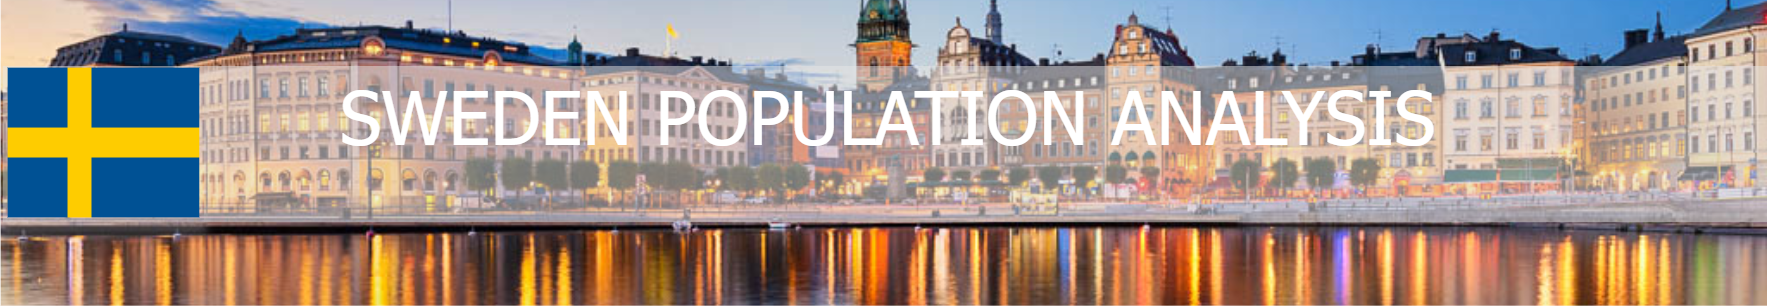

In [ ]:
# @title


## IMPORTS

In [ ]:
# @title
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

## Population by Sex & Age

In [ ]:
# @title
# Population, county - sex - year
population_county_sex_age = pd.read_excel(r"https://raw.githubusercontent.com/burak-analyst/02_Data_Science_Projects/main/population_county_sex_age.xlsx")
#population_county_sex_age.head()

In [ ]:
# @title
# Group by 'year' and sum 'men_population' and 'women_population'
population_over_time = population_county_sex_age.groupby('year').agg({
    'men_population': 'sum',
    'women_population': 'sum'
}).reset_index()

# Create the figure
fig = go.Figure()

# Add men's population line
fig.add_trace(go.Scatter(
    x=population_over_time['year'],
    y=population_over_time['men_population'],
    mode='lines+markers',
    name='Men',
    line=dict(color='blue'),
    marker=dict(size=8)
))

# Add women's population line
fig.add_trace(go.Scatter(
    x=population_over_time['year'],
    y=population_over_time['women_population'],
    mode='lines+markers',
    name='Women',
    line=dict(color='red'),
    marker=dict(size=8)
))

# Update layout
fig.update_layout(
    title='Sweden Population Over Time',
    xaxis_title='Year',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(showgrid=True, gridcolor='LightGray'),
    template='plotly_white'  # Elegant layout without clutter
)

# Show the figure
fig.show()


In [ ]:
# @title
import plotly.graph_objects as go

# Ensure 'population_county_sex_age' is sorted by 'year' and 'age_group'
population_county_sex_age = population_county_sex_age.sort_values(by=['year', 'age_group'])

# Define the correct order for age groups
age_order = [
    "0-9 years", "10-19 years", "20-29 years", "30-39 years", "40-49 years",
    "50-59 years", "60-69 years", "70-79 years", "80-89 years", "90-99 years", "100+ years"
]

# Create the figure with animation
fig = go.Figure()

# Add traces for each year with animation
for year in population_county_sex_age['year'].unique():
    # Filter data for the current year
    year_data = population_county_sex_age[population_county_sex_age['year'] == year]
    men_population = year_data.groupby('age_group')['men_population'].sum().reindex(age_order)
    women_population = year_data.groupby('age_group')['women_population'].sum().reindex(age_order)

    # Add men's data for this year, positioned on the left (negative values)
    fig.add_trace(go.Bar(
        y=age_order,
        x=-men_population,  # Use negative values for men
        name='Men',
        orientation='h',
        marker=dict(color='blue'),
        hovertemplate='%{x:.1f} men',
        text=(-men_population / 1_000_000).round(2).astype(str) + ' mil',  # Format as millions with 2 decimal and 'mil'
        textposition='inside',  # Position the text inside the bar
        visible=(year == population_county_sex_age['year'].min())  # Show only the first year initially
    ))

    # Add women's data for this year, positioned on the right
    fig.add_trace(go.Bar(
        y=age_order,
        x=women_population,
        name='Women',
        orientation='h',
        marker=dict(color='red'),
        hovertemplate='%{x:.1f} women',
        text=(women_population / 1_000_000).round(2).astype(str) + ' mil',  # Format as millions with 2 decimal and 'mil'
        textposition='inside',  # Position the text inside the bar
        visible=(year == population_county_sex_age['year'].min())  # Show only the first year initially
    ))

# Update layout to create animation frames
fig.update_layout(
    title='Sweden Population Pyramid by Age Group, Sex, and Year (in millions)',
    xaxis=dict(
        title='Population',
        range=[-population_county_sex_age['men_population'].max(), population_county_sex_age['women_population'].max()],
        showgrid=True,
    ),
    yaxis=dict(
        title='Age Group',
        categoryorder='array',
        categoryarray=age_order,
    ),
    barmode='overlay',
    bargap=0.1,
    showlegend=True,
    updatemenus=[{
        "buttons": [
            {
                "args": [None, {"frame": {"duration": 500, "redraw": True}, "fromcurrent": True}],
                "label": "Play",
                "method": "animate",
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": True}, "mode": "immediate", "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate",
            },
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top",
    }],
    sliders=[{
        "active": 0,
        "yanchor": "top",
        "xanchor": "left",
        "currentvalue": {
            "font": {"size": 20},
            "prefix": "Year:",
            "visible": True,
            "xanchor": "right"
        },
        "transition": {"duration": 300, "easing": "cubic-in-out"},
        "pad": {"b": 10, "t": 50},
        "len": 0.9,
        "x": 0.1,
        "y": 0,
        "steps": [
            {
                "args": [
                    [str(year)],
                    {"frame": {"duration": 300, "redraw": True}, "mode": "immediate", "transition": {"duration": 300}},
                ],
                "label": str(year),
                "method": "animate",
            }
            for year in population_county_sex_age['year'].unique()
        ],
    }]
)

# Create frames for each year
fig.frames = [
    go.Frame(
        data=[
            go.Bar(y=age_order, x=-population_county_sex_age[population_county_sex_age['year'] == year].groupby('age_group')['men_population'].sum().reindex(age_order), name='Men',
                    text=(-population_county_sex_age[population_county_sex_age['year'] == year].groupby('age_group')['men_population'].sum().reindex(age_order) / 1_000_000).round(2).astype(str) + ' mil',
                    textposition='inside'),
            go.Bar(y=age_order, x=population_county_sex_age[population_county_sex_age['year'] == year].groupby('age_group')['women_population'].sum().reindex(age_order), name='Women',
                    text=(population_county_sex_age[population_county_sex_age['year'] == year].groupby('age_group')['women_population'].sum().reindex(age_order) / 1_000_000).round(2).astype(str) + ' mil',
                    textposition='inside')
        ],
        name=str(year),
    )
    for year in population_county_sex_age['year'].unique()
]

fig.show()

In [ ]:
# @title
# Group by 'year' and sum 'men_population' and 'women_population'
population_over_time = population_county_sex_age.groupby('year').agg({
    'men_population': 'sum',
    'women_population': 'sum'
}).reset_index()

# Calculate growth for men and women
population_over_time['men_growth'] = population_over_time['men_population'].diff().fillna(0)
population_over_time['women_growth'] = population_over_time['women_population'].diff().fillna(0)

# Create the figure
fig = go.Figure()

# Add men's growth bar
fig.add_trace(go.Bar(
    x=population_over_time['year'],
    y=population_over_time['men_growth'],
    name='Men Growth',
    marker=dict(color='blue')
))

# Add women's growth bar
fig.add_trace(go.Bar(
    x=population_over_time['year'],
    y=population_over_time['women_growth'],
    name='Women Growth',
    marker=dict(color='red')
))

# Update layout
fig.update_layout(
    title='Sweden Population Growth Over Time',
    xaxis_title='Year',
    yaxis_title='Population Growth',
    barmode='group',  # Group bars together for comparison
    xaxis=dict(tickmode='linear'),
    yaxis=dict(showgrid=True, gridcolor='LightGray'),
    template='plotly_white'  # Elegant layout without clutter
)

# Show the figure
fig.show()



In [ ]:
# @title
import plotly.graph_objs as go

# Sample DataFrame (replace with your actual DataFrame)
# Assuming population_county_sex_age is already defined with the necessary data

# Initialize the figure
fig = go.Figure()

# Get unique counties for the dropdown
unique_counties = population_county_sex_age['county'].unique()

# Add traces for each county
for county in unique_counties:
    filtered_data = population_county_sex_age[population_county_sex_age['county'] == county]

    # Sum population by year
    men_population = filtered_data.groupby('year')['men_population'].sum().reset_index()
    women_population = filtered_data.groupby('year')['women_population'].sum().reset_index()

    # Add trace for men's population
    fig.add_trace(go.Scatter(
        x=men_population['year'],
        y=men_population['men_population'],
        mode='lines+markers',
        name=f'{county} Men Population',
        visible=False  # Set to False initially
    ))

    # Add trace for women's population
    fig.add_trace(go.Scatter(
        x=women_population['year'],
        y=women_population['women_population'],
        mode='lines+markers',
        name=f'{county} Women Population',
        visible=False  # Set to False initially
    ))

# Make the first county's traces visible by default
if unique_counties.size > 0:
    fig.data[0].visible = True  # First men's population trace
    fig.data[1].visible = True  # First women's population trace

# Update layout with dropdown menu for counties
fig.update_layout(
    title='Population Over Years by County',
    xaxis_title='Year',
    yaxis_title='Population',
    yaxis_tickformat=',',
    showlegend=True,
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [
                        {"visible": [county in trace.name for trace in fig.data]},
                        {"title": f'Population in {county} Over Years'}
                    ],
                    "label": county,
                    "method": "update"
                } for county in unique_counties
            ] + [
                {
                    "args": [
                        {"visible": [True] * len(fig.data)},  # Show all traces
                        {"title": "Population for All Counties"}
                    ],
                    "label": "All Counties",
                    "method": "update"
                }
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

# Show the plot
fig.show()


## Population by Human Development Index

In [ ]:
# @title
population_human_dev_birthplace_sex = pd.read_excel(r"https://raw.githubusercontent.com/burak-analyst/02_Data_Science_Projects/main/population_human_dev_birthplace_sex.xlsx")
#population_human_dev_birthplace_sex.head()

In [ ]:
# @title
import pandas as pd
import plotly.express as px

# Assuming population_human_dev_birthplace_sex is defined with the necessary data

# Filter out rows with zero populations for cleaner visualization
filtered_data = population_human_dev_birthplace_sex[
    (population_human_dev_birthplace_sex['women_population'] > 0) |
    (population_human_dev_birthplace_sex['men_population'] > 0)
]

# Melt the DataFrame for easier plotting
melted_data = filtered_data.melt(id_vars=['year', 'place_of_birth_category'],
                                  value_vars=['women_population', 'men_population'],
                                  var_name='gender',
                                  value_name='population')

# Convert gender to have negative values for women to create a pyramid effect
melted_data['population'] = melted_data.apply(lambda x: -x['population'] if x['gender'] == 'women_population' else x['population'], axis=1)

# Group by year and place_of_birth_category to sum the population for proper visualization
grouped_data = melted_data.groupby(['year', 'place_of_birth_category', 'gender'], as_index=False).sum()

# Create a population pyramid with a play axis for the year
fig = px.bar(
    grouped_data,
    x='population',
    y='place_of_birth_category',
    color='gender',
    animation_frame='year',
    title='Population Pyramid by Human Development Index with Yearly Animation',
    labels={'place_of_birth_category': 'Human Development Index Category', 'population': 'Population'},
    orientation='h',
    range_x=[-grouped_data['population'].abs().max(), grouped_data['population'].abs().max()],  # Set range for better visual balance
    text=grouped_data['population'].abs().apply(lambda x: f"{x / 1_000_000:.2f}M")  # Format as millions with 2 decimals
)

# Format the x-axis tick labels to show millions
fig.update_layout(
    xaxis_tickvals=[-2000000, -1000000, 0, 1000000, 2000000],  # Adjust these based on your actual data range
    xaxis_ticktext=['2M', '1M', '0', '1M', '2M']
)

# Update layout for better readability
fig.update_layout(yaxis_title='Human Development Index Category',
                  xaxis_title='Population',
                  showlegend=True)  # Show legend for gender

# Slow down the play speed
fig.update_layout(transition_duration=500)  # Adjust duration in milliseconds

# Show the plot
fig.show()


## Population Density

In [ ]:
# @title
population_density_county_year = pd.read_excel(r"https://raw.githubusercontent.com/burak-analyst/02_Data_Science_Projects/main/population_density_county_year.xlsx")
#population_density_county_year.head()

In [ ]:
# @title
import plotly.graph_objects as go

# Assuming population_density_county_year is already defined with the necessary data

# Initialize the figure
fig = go.Figure()

# Get unique municipalities
municipalities = population_density_county_year['municipality'].unique()

# Add traces for each municipality
for municipality in municipalities:
    municipality_data = population_density_county_year[population_density_county_year['municipality'] == municipality]

    # Add trace for population density
    fig.add_trace(go.Scatter(
        x=municipality_data['year'],
        y=municipality_data['population_density_per_sq_km'],
        mode='lines+markers',
        name=municipality,
        marker=dict(size=8)
    ))

# Update layout with dropdown menu for municipalities
fig.update_layout(
    title='Population Density per Square Kilometer by Municipality',
    xaxis_title='Year',
    yaxis_title='Population Density (per sq km)',
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [
                        {"visible": [municipality in trace.name for trace in fig.data]},
                        {"title": f"Population Density for {municipality}"}
                    ],
                    "label": municipality,
                    "method": "update"
                } for municipality in municipalities
            ] + [
                {
                    "args": [
                        {"visible": [True] * len(fig.data)},  # Show all traces
                        {"title": "Population Density for All Municipalities"}
                    ],
                    "label": "All Municipalities",
                    "method": "update"
                }
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

# Show the plot
fig.show()


In [ ]:
# @title
# Find the maximum year in the dataset
max_year = population_density_county_year['year'].max()

# Filter the data for the maximum year
top_counties = population_density_county_year[population_density_county_year['year'] == max_year]

# Sort by population density and select the top 10
top_counties = top_counties.sort_values(by='population_density_per_sq_km', ascending=False).head(10)

# Create a bar chart
fig = px.bar(
    top_counties,
    x='municipality',
    y='population_density_per_sq_km',
    title=f'Top 10 Municipalities by Population Density in {max_year}',
    labels={'municipality': 'Municipality', 'population_density_per_sq_km': 'Population Density (per sq km)'},
    color='population_density_per_sq_km',
    color_continuous_scale='Viridis'
)

# Show the plot
fig.show()


## Marital Status Analysis

In [ ]:
# @title
# Group by 'year' AND 'marital status' and sum 'men_population' and 'women_population'
marital_population = population_county_sex_age.groupby(['year', 'marital_status']).agg({
    'men_population': 'sum',
    'women_population': 'sum'
}).reset_index()

# Sum total men & women population partitioned by year
total_men_population = marital_population.groupby('year')['men_population'].sum().reset_index()
total_women_population = marital_population.groupby('year')['women_population'].sum().reset_index()


# Sum single & married men population partitioned by year
single_men_population = marital_population[marital_population['marital_status'] == 'single'].groupby('year')['men_population'].sum().reset_index()
married_men_population = marital_population[marital_population['marital_status'] == 'married'].groupby('year')['men_population'].sum().reset_index()

# Sum single & married women population partitioned by year
single_women_population = marital_population[marital_population['marital_status'] == 'single'].groupby('year')['women_population'].sum().reset_index()
married_women_population = marital_population[marital_population['marital_status'] == 'married'].groupby('year')['women_population'].sum().reset_index()


# Merge all the DataFrames on 'year'
merged_population = total_men_population.merge(single_men_population, on='year', suffixes=('', '_single'))
merged_population = merged_population.merge(married_men_population, on='year', suffixes=('', '_married'))
merged_population = merged_population.merge(total_women_population, on='year', suffixes=('', '_total_women'))
merged_population = merged_population.merge(single_women_population, on='year', suffixes=('', '_single_women'))
merged_population = merged_population.merge(married_women_population, on='year', suffixes=('', '_married_women'))

# Rename columns for clarity
merged_population.columns = ['year', 'total_men', 'single_men', 'married_men', 'total_women', 'single_women', 'married_women']

# Calculate ratios
merged_population['single_men_ratio'] = merged_population['single_men'] / merged_population['total_men']
merged_population['married_men_ratio'] = merged_population['married_men'] / merged_population['total_men']
merged_population['single_women_ratio'] = merged_population['single_women'] / merged_population['total_women']
merged_population['married_women_ratio'] = merged_population['married_women'] / merged_population['total_women']

# Round the ratios to two decimal places
merged_population['single_men_ratio'] = merged_population['single_men_ratio'].round(2)
merged_population['married_men_ratio'] = merged_population['married_men_ratio'].round(2)
merged_population['single_women_ratio'] = merged_population['single_women_ratio'].round(2)
merged_population['married_women_ratio'] = merged_population['married_women_ratio'].round(2)

# Display the final DataFrame
#merged_population.head()

In [ ]:
# @title
import plotly.graph_objects as go

# Create a line chart for men's single and married ratios
fig_men = go.Figure()
fig_men.add_trace(go.Scatter(
    x=merged_population['year'],
    y=merged_population['single_men_ratio'],
    mode='lines+markers',
    name='Single Men Ratio',
    line=dict(color='blue'),
    marker=dict(size=8)
))
fig_men.add_trace(go.Scatter(
    x=merged_population['year'],
    y=merged_population['married_men_ratio'],
    mode='lines+markers',
    name='Married Men Ratio',
    line=dict(color='orange'),
    marker=dict(size=8)
))

# Update layout for men's ratios
fig_men.update_layout(
    title='Men Marital Status Ratios Over Time',
    xaxis_title='Year',
    yaxis_title='Ratio',
    yaxis_tickformat='.0%',
    xaxis=dict(tickmode='linear', tickvals=merged_population['year'])
)

# Create a line chart for women's single and married ratios
fig_women = go.Figure()
fig_women.add_trace(go.Scatter(
    x=merged_population['year'],
    y=merged_population['single_women_ratio'],
    mode='lines+markers',
    name='Single Women Ratio',
    line=dict(color='red'),
    marker=dict(size=8)
))
fig_women.add_trace(go.Scatter(
    x=merged_population['year'],
    y=merged_population['married_women_ratio'],
    mode='lines+markers',
    name='Married Women Ratio',
    line=dict(color='purple'),
    marker=dict(size=8)
))

# Update layout for women's ratios
fig_women.update_layout(
    title='Women Marital Status Ratios Over Time',
    xaxis_title='Year',
    yaxis_title='Ratio',
    yaxis_tickformat='.0%',
    xaxis=dict(tickmode='linear', tickvals=merged_population['year'])

)

# Show the plots
fig_men.show()
fig_women.show()


In [ ]:
# @title
average_marriage_duration_year_municipality = pd.read_excel(r"https://raw.githubusercontent.com/burak-analyst/02_Data_Science_Projects/main/average_marriage_duration_year_municipality.xlsx")
#average_marriage_duration_year_municipality.head()

In [ ]:
# @title
import plotly.express as px
import pandas as pd

# Convert column to numeric, forcing non-numeric values to NaN, then drop NaNs
average_marriage_duration_year_municipality['avg_marriage_duration_ended_by_divorce'] = pd.to_numeric(
    average_marriage_duration_year_municipality['avg_marriage_duration_ended_by_divorce'], errors='coerce'
)
average_marriage_duration_year_municipality = average_marriage_duration_year_municipality.dropna(subset=['avg_marriage_duration_ended_by_divorce'])

# Group by year and calculate mean duration
avg_duration_by_year = average_marriage_duration_year_municipality.groupby('year')['avg_marriage_duration_ended_by_divorce'].mean().reset_index()

# Create line plot
fig = px.line(avg_duration_by_year, x='year', y='avg_marriage_duration_ended_by_divorce',
              title="Average Marriage Duration Ended by Divorce Over Years",
              markers=True, labels={'avg_marriage_duration_ended_by_divorce': 'Average Duration (Years)', 'year': 'Year'})

# Ensure all x-axis tick values are shown
fig.update_xaxes(dtick=1)

# Show the plot
fig.show()


In [ ]:
# @title
import plotly.graph_objects as go

# Create initial filtered DataFrame for the first municipality
initial_municipality = average_marriage_duration_year_municipality["municipality"].unique()[0]
filtered_df = average_marriage_duration_year_municipality[average_marriage_duration_year_municipality["municipality"] == initial_municipality]

# Create figure with initial data for the first municipality
fig = go.Figure(
    go.Scatter(
        x=filtered_df["year"],
        y=filtered_df["avg_marriage_duration_ended_by_divorce"],
        mode="lines+markers",
        name=initial_municipality
    )
)

# Add dropdown menu to select municipality
dropdown_buttons = [
    {
        "method": "update",
        "label": municipality,
        "args": [
            {
                "x": [average_marriage_duration_year_municipality[average_marriage_duration_year_municipality["municipality"] == municipality]["year"]],
                "y": [average_marriage_duration_year_municipality[average_marriage_duration_year_municipality["municipality"] == municipality]["avg_marriage_duration_ended_by_divorce"]],
            },
            {"title": f"Average Marriage Duration for {municipality}"}
        ],
    }
    for municipality in average_marriage_duration_year_municipality["municipality"].unique()
]

# Update layout with dropdown
fig.update_layout(
    updatemenus=[
        {
            "buttons": dropdown_buttons,
            "direction": "down",
            "showactive": True,
            "x": 0.17,
            "xanchor": "left",
            "y": 1.15,
            "yanchor": "top"
        }
    ],
    title=f"Average Marriage Duration for {initial_municipality}",
    xaxis_title="Year",
    yaxis_title="Average Duration (Years)"
)

# Set x-axis to display all tick values
fig.update_xaxes(dtick=1)

fig.show()


In [ ]:
# @title
average_age_first_marriage_by_sex = pd.read_excel(r"https://raw.githubusercontent.com/burak-analyst/02_Data_Science_Projects/main/average_age_first_marriage_by_sex.xlsx")
#average_age_first_marriage_by_sex.head()

In [ ]:
# @title
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add line for men
fig.add_trace(go.Scatter(
    x=average_age_first_marriage_by_sex["year"],
    y=average_age_first_marriage_by_sex["men"],
    mode="lines+markers",
    name="Men",
    line=dict(color="blue")
))

# Add line for women
fig.add_trace(go.Scatter(
    x=average_age_first_marriage_by_sex["year"],
    y=average_age_first_marriage_by_sex["women"],
    mode="lines+markers",
    name="Women",
    line=dict(color="red")
))

# Update layout to show x-axis labels at intervals of 5 years (or 10 if necessary)
fig.update_layout(
    title="Average Age at First Marriage by Sex",
    xaxis_title="Year",
    yaxis_title="Average Age",
    xaxis=dict(tickmode="linear", dtick=5)  # Change `dtick` to 10 if still cluttered
)

fig.show()


## Name Analysis

In [ ]:
# @title
top_10_names_by_sex = pd.read_excel(r"https://raw.githubusercontent.com/burak-analyst/02_Data_Science_Projects/main/top10_names_by_sex.xlsx")
# Define a list of month names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Find month names in the DataFrame
month_names = top_10_names_by_sex[top_10_names_by_sex['name'].isin(months)]
top_10_names_by_sex = top_10_names_by_sex[~top_10_names_by_sex['name'].isin(months)]
#top_10_names_by_sex.head()

In [ ]:
# @title
# Filter DataFrame for men and women
men_names = top_10_names_by_sex[top_10_names_by_sex['gender'] == 'man']
women_names = top_10_names_by_sex[top_10_names_by_sex['gender'] == 'woman']

# Create line chart for men
fig_men = px.line(
    men_names,
    x='year',
    y='number_of_bearers',
    color='name',
    title='Top 10 Male Names Over Time',
    markers=True,
    labels={'number_of_bearers': 'Number of Bearers'},
    hover_data={'ranking': True, 'number_of_bearers': True}  # Show ranking on hover
)

# Set x-axis to show all years
fig_men.update_xaxes(tickmode='linear', tickvals=men_names['year'].unique())

# Create line chart for women
fig_women = px.line(
    women_names,
    x='year',
    y='number_of_bearers',
    color='name',
    title='Top 10 Female Names Over Time',
    markers=True,
    labels={'number_of_bearers': 'Number of Bearers'},
    hover_data={'ranking': True, 'number_of_bearers': True}  # Show ranking on hover
)

# Set x-axis to show all years
fig_women.update_xaxes(tickmode='linear', tickvals=women_names['year'].unique())

# Show the plots
fig_men.show()
fig_women.show()


In [ ]:
# @title
top_names = top_10_names_by_sex[top_10_names_by_sex['ranking'] == 1]

# Create a summary DataFrame with the most popular names
summary = top_names.groupby('year').agg(
    most_popular_men=('name', lambda x: x[top_names['gender'] == 'man'].values[0]),
    most_popular_women=('name', lambda x: x[top_names['gender'] == 'woman'].values[0])
).reset_index()

# Create the summary_text column
summary['summary_text'] = summary.apply(
    lambda row: f"For {row['year']}, most popular man name: {row['most_popular_men']}, woman name: {row['most_popular_women']}",
    axis=1
)

import plotly.graph_objects as go

# Create a table visualization
fig = go.Figure(data=[go.Table(
    header=dict(values=['Most Popular Names'],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[summary['summary_text']],
               fill_color='lavender',
               align='left'))
])

# Update layout
fig.update_layout(title='Most Popular Names Summary')

# Show the plot
fig.show()


## Migration Analysis

In [ ]:
# @title
in_out_migration_by_municipalities_year = pd.read_excel(r"https://raw.githubusercontent.com/burak-analyst/02_Data_Science_Projects/main/in_out_migration_by_municipalities_year.xlsx")
# Drop rows with missing 'year' values, if necessary
in_out_migration_by_municipalities_year = in_out_migration_by_municipalities_year.dropna(subset=['year'])

# Convert 'year' to integer type
in_out_migration_by_municipalities_year['year'] = in_out_migration_by_municipalities_year['year'].astype(int)

# Calculate net migrations for men and women
in_out_migration_by_municipalities_year['net_men_migration'] = (
    in_out_migration_by_municipalities_year['men_inmigrations'] - in_out_migration_by_municipalities_year['men_outmigrations']
)
in_out_migration_by_municipalities_year['net_women_migration'] = (
    in_out_migration_by_municipalities_year['women_inmigrations'] - in_out_migration_by_municipalities_year['women_outmigrations']
)

# Group by year and sum net migration
net_migration_summary = in_out_migration_by_municipalities_year.groupby('year')[['net_men_migration', 'net_women_migration']].sum().reset_index()

# Display the resulting DataFrame
#net_migration_summary.head()


In [ ]:
# @title
# Create the line chart
fig = go.Figure()

# Add line for net men migration
fig.add_trace(go.Scatter(
    x=net_migration_summary['year'],
    y=net_migration_summary['net_men_migration'],
    mode='lines+markers',
    name='Men Net Migration',
    line=dict(color='blue')
))

# Add line for net women migration
fig.add_trace(go.Scatter(
    x=net_migration_summary['year'],
    y=net_migration_summary['net_women_migration'],
    mode='lines+markers',
    name='Women Net Migration',
    line=dict(color='red')
))

# Update layout for all year names on x-axis, but manage clutter
fig.update_layout(
    title="Net Migration by Year",
    xaxis_title="Year",
    yaxis_title="Net Migration",
    xaxis=dict(
        tickmode='linear',
        dtick=2,  # Show every 2nd year to reduce clutter
    )
)

# Show the chart
fig.show()


In [ ]:
# @title
import plotly.graph_objects as go

# Assuming in_out_migration_by_municipalities_year is already defined and has the necessary calculations

# Initialize the figure
fig = go.Figure()

# Get unique municipalities
municipalities = in_out_migration_by_municipalities_year['municipality'].unique()

# Add traces for each municipality
for municipality in municipalities:
    municipality_data = in_out_migration_by_municipalities_year[in_out_migration_by_municipalities_year['municipality'] == municipality]

    # Add trace for men net migration
    fig.add_trace(go.Scatter(
        x=municipality_data['year'],
        y=municipality_data['net_men_migration'],
        mode='lines+markers',
        name=f'Men - {municipality}',
        marker=dict(color='blue')
    ))

    # Add trace for women net migration
    fig.add_trace(go.Scatter(
        x=municipality_data['year'],
        y=municipality_data['net_women_migration'],
        mode='lines+markers',
        name=f'Women - {municipality}',
        marker=dict(color='red')
    ))

# Update layout with dropdown menu for municipalities
fig.update_layout(
    title='Net Migration by Municipality',
    xaxis_title='Year',
    yaxis_title='Net Migration',
    updatemenus=[
        {
            "buttons": [
                {
                    "args": [
                        {"visible": [municipality in trace.name for trace in fig.data]},
                        {"title": f"Net Migration for {municipality}"}
                    ],
                    "label": municipality,
                    "method": "update"
                } for municipality in municipalities
            ] + [
                {
                    "args": [
                        {"visible": [True] * len(fig.data)},  # Show all traces
                        {"title": "Net Migration for All Municipalities"}
                    ],
                    "label": "All Municipalities",
                    "method": "update"
                }
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

# Show the plot
fig.show()
